In [11]:
import numpy as np
import pandas as pd

from analaiser import SymbolAnalyzer

# Load data

In [12]:
# %run get_data.ipynb

In [13]:
tickers = pd.read_csv('data/data.csv')
capital = pd.read_csv('data/top_cap.csv')

In [14]:
tickers

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore,symbol
0,2024-06-22,64143.5600,64546.8100,63943.8200,64262.0100,7.308955e+03,1719100799999,4.700272e+08,562832,3.756290e+03,2.415839e+08,0,BTCUSDT
1,2024-06-23,64262.0100,64521.0000,63178.3200,63210.0100,8.224454e+03,1719187199999,5.268485e+08,592759,3.974680e+03,2.546857e+08,0,BTCUSDT
2,2024-06-24,63210.0100,63369.8000,58402.0000,60293.3000,5.216135e+04,1719273599999,3.180853e+09,2190787,2.449559e+04,1.493633e+09,0,BTCUSDT
3,2024-06-25,60293.3000,62420.0000,60257.0600,61806.0100,3.118924e+04,1719359999999,1.914901e+09,1277481,1.536008e+04,9.430716e+08,0,BTCUSDT
4,2024-06-26,61806.0100,62487.8100,60712.0000,60864.9900,2.248566e+04,1719446399999,1.381717e+09,1112152,1.143503e+04,7.026762e+08,0,BTCUSDT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21673,2025-09-26,1.2773,1.4264,1.1146,1.2219,1.010415e+09,1758931199999,1.259847e+09,3186509,5.066805e+08,6.325414e+08,0,XPLUSDT
21674,2025-09-27,1.2218,1.6708,1.1920,1.6290,6.552207e+08,1759017599999,9.638262e+08,3977844,3.460654e+08,5.080071e+08,0,XPLUSDT
21675,2025-09-28,1.6288,1.6930,1.3596,1.4519,4.625063e+08,1759103999999,6.839728e+08,2510564,2.231692e+08,3.307271e+08,0,XPLUSDT
21676,2025-09-29,1.4518,1.5512,1.1578,1.1985,5.389900e+08,1759190399999,6.963132e+08,2446296,2.578247e+08,3.336718e+08,0,XPLUSDT


In [15]:
capital

,symbol,name,cap
0,BTCUSDT,Bitcoin,2282540760213
1,ETHUSDT,Ethereum,499935212848
2,USDTUSDT,Tether,174941796676
3,XRPUSDT,XRP,170476500641
4,BNBUSDT,BNB,140673397450
...,...,...,...
95,XAUTUSDT,Tether Gold,1451283365
96,LBTCUSDT,Lombard Staked BTC,1397065920
97,FETUSDT,Artificial Superintelligence Alliance,1386104051
98,JUPUSDT,Jupiter,1371292926


In [16]:
anal = SymbolAnalyzer(tickers, capital)

In [ ]:
# df = anal.run(symbol_list=['BTCUSDT', 'ETHUSDT', 'DOTUSDT', 'ONDOUSDT'], optimisation=False)
# df = anal.run(symbol_list=['BTCUSDT', 'ETHUSDT', 'DOTUSDT', 'ONDOUSDT'])
# df = anal.run(optimisation=False)
df = anal.run()

Analyzing: 100%|██████████| 2/2 [00:00<00:00, 53.62it/s]


In [18]:
df

,date,symbol,last_price,direction,signal_text,cap,SL,TP,interes,last_rsi,...,min_support_30,max_resist_30,min_historical,max_historical,mean_100,mean_30,votes_up,votes_down,total_votes,patterns
1,2025-10-01,ONDOUSDT,0.8743,⬇️7 (U:15.1 D:25.4 N:3.2),HOLD,2.804269,0.707076,1.04916,0.00000,45.055493,...,0.8726,1.101,0.6726,1.1431,0.93540,0.966530,15.103731,25.442008,7,"{'hammer_up': [('2025-07-15', 0.9453), ('2025-..."
0,2025-10-01,DOTUSDT,3.8480,➡️-1 (U:18.0 D:14.9 N:8.5),HOLD,5.961632,3.174285,4.61760,0.03842,47.364094,...,3.6930,4.533,3.1530,5.3090,3.90422,4.073533,18.004169,14.864728,-1,"{'hammer_up': [('2025-07-03', 3.665), ('2025-0..."


In [19]:
df['signal_text'].value_counts()

signal_text
HOLD    2
Name: count, dtype: int64

# Технічні індикатори

## 1. ATR (Average True Range)
- **Що це:** Показує волатильність інструменту.
- **Для чого:** Використовується для оцінки ризику, постановки стоп-лоссів.
- **Граничні значення:** не має стандартних "overbought/oversold", високі значення → висока волатильність, низькі → спокійний ринок.

## 2. RSI (Relative Strength Index)
- **Що це:** Індикатор сили тренду.
- **Для чого:** Визначає перекупленість/перепроданість.
- **Граничні значення:**
  - `>70` → перекупленість
  - `<30` → перепроданість
  - `50` → нейтральна зона

## 3. ADX (Average Directional Index)
- **Що це:** Сила тренду без напрямку.
- **Для чого:** Визначає силу тренду, допомагає вирішити, чи торгувати трендово чи боком.
- **Граничні значення:**
  - `>25` → сильний тренд
  - `<20` → слабкий або боковий ринок

11:55:35 - cmdstanpy - INFO - Chain [1] start processing
11:55:35 - cmdstanpy - INFO - Chain [1] done processing
11:55:35 - cmdstanpy - INFO - Chain [1] start processing
11:55:35 - cmdstanpy - INFO - Chain [1] done processing


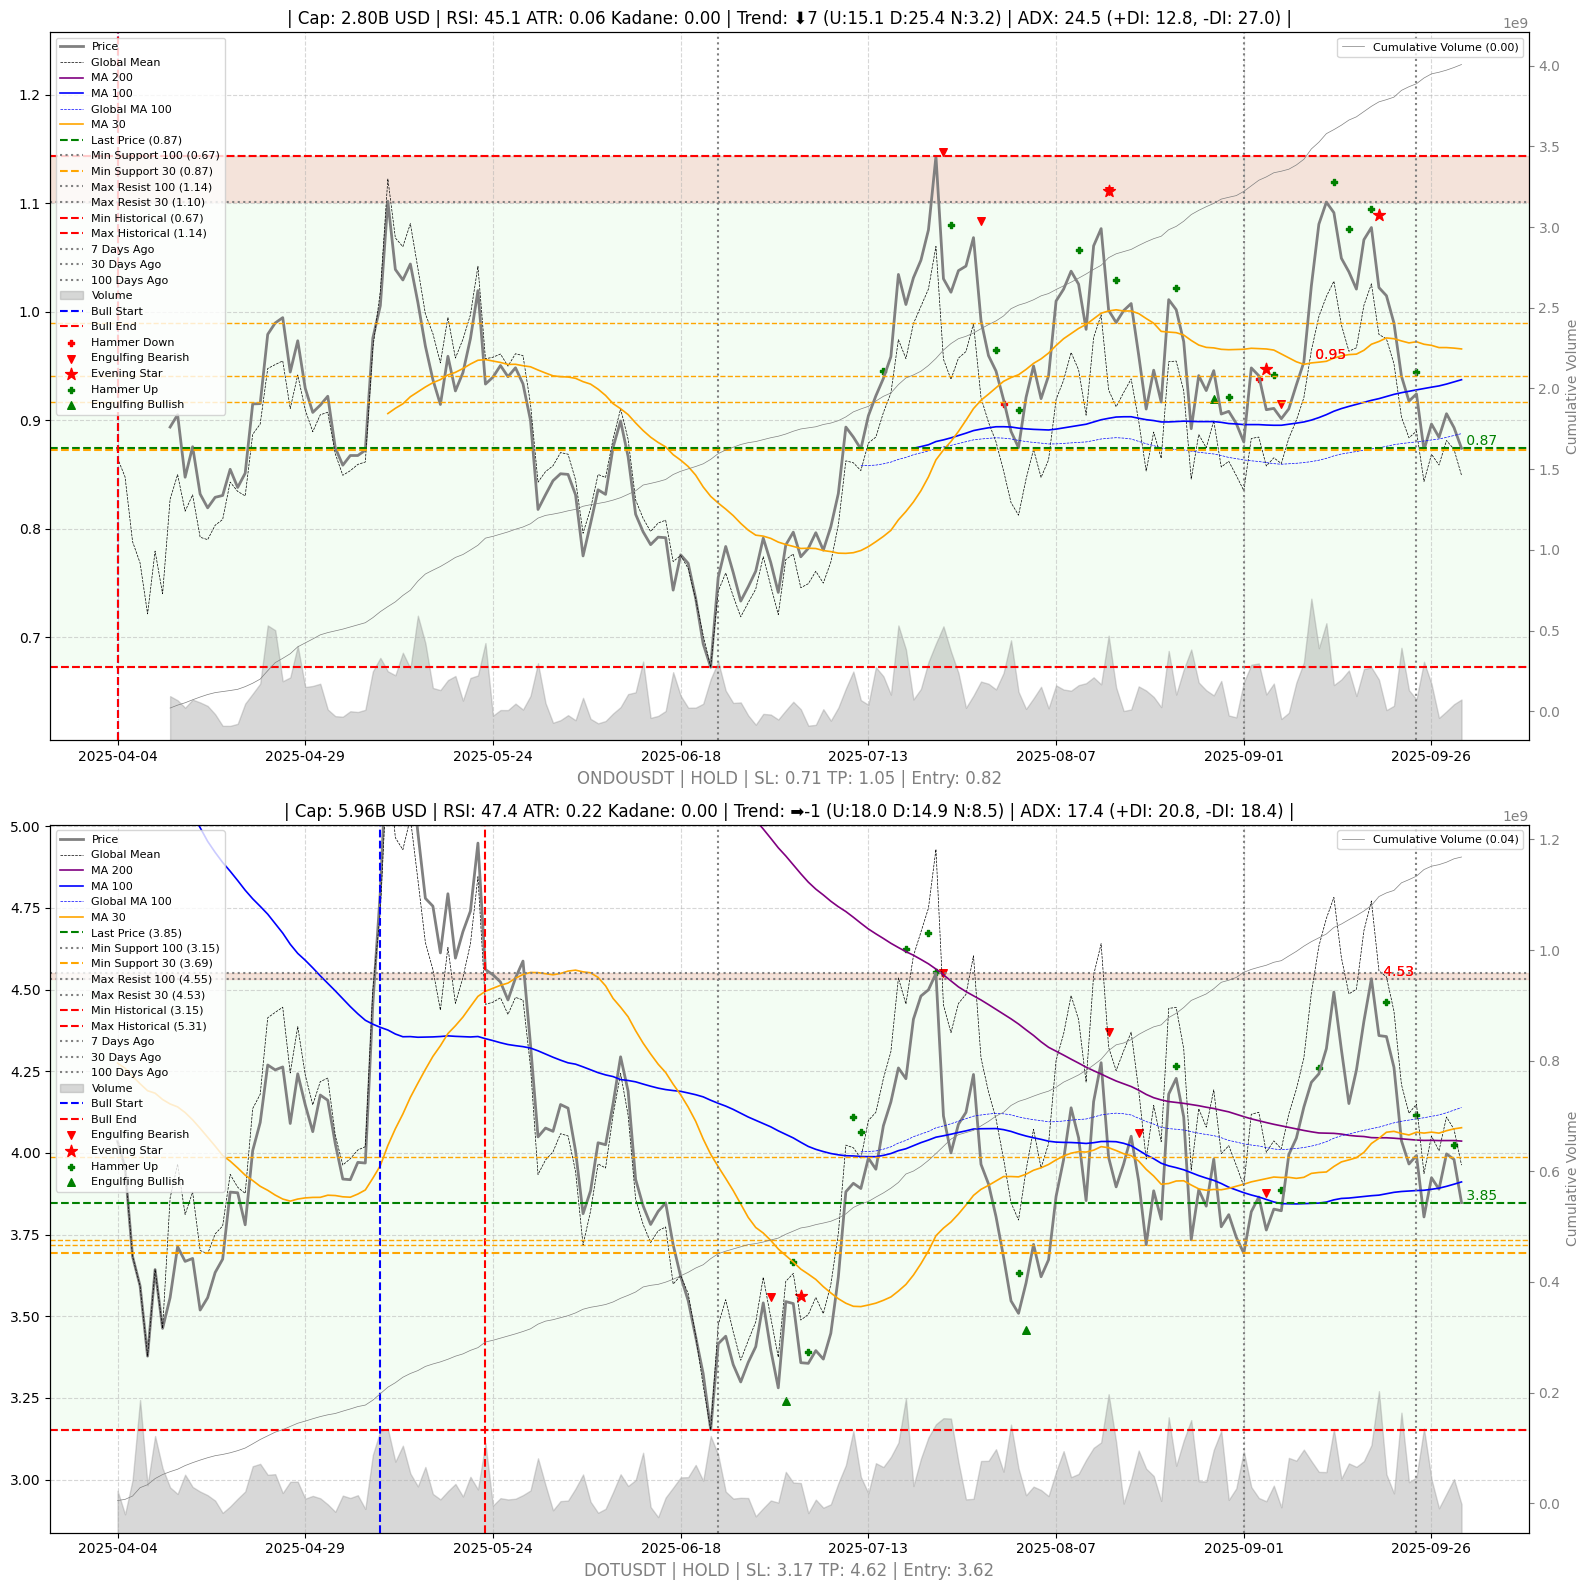

In [20]:
anal.graph()